In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [6]:
filename='./data/cow_data_clean.csv'
cow_DF=pd.read_csv(filename)
cow_DF.head(2)

,Unnamed: 0,성별,중량,최저가,낙찰가,결격사유 여부,종류,성별_N,종류_N
0,0,암,580,360,363,1,큰소,0,0
1,1,암,460,320,353,0,큰소,0,0


In [7]:
target=cow_DF['낙찰가']
feature=cow_DF[['중량','결격사유 여부','성별_N','종류_N']]


In [8]:
cow_rf=RandomForestRegressor(random_state=0, n_estimators=1000)
n_mse_scores = cross_val_score(cow_rf, feature, target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*n_mse_scores)
avg_rmse = np.mean(rmse_scores)
print('5 교차 검증의 개별 Negative MSE scores: ', np.round(n_mse_scores,2))
print('5 교차 검증의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 교차 검증의 평균 RMSE scores: ', np.round(avg_rmse,2))


5 교차 검증의 개별 Negative MSE scores:  [-18397.68  -4205.6  -27083.62 -23403.6  -20343.01]
5 교차 검증의 개별 RMSE scores:  [135.64  64.85 164.57 152.98 142.63]
5 교차 검증의 평균 RMSE scores:  132.13


In [9]:
def get_model_cv_prediction(model, feature, target):
    n_mse_scores = cross_val_score(model, feature, target,scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*n_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ', model.__class__.__name__, ' #####')
    print('5 교차 검증의 평균 RMSE scores: ', np.round(avg_rmse,2))

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [12]:
dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

models = [dt_reg,rf_reg,gb_reg,xgb_reg,lgb_reg]
for model in models:
    get_model_cv_prediction(model, feature, target)

#####  DecisionTreeRegressor  #####
5 교차 검증의 평균 RMSE scores:  134.74
#####  RandomForestRegressor  #####
5 교차 검증의 평균 RMSE scores:  132.13
#####  GradientBoostingRegressor  #####
5 교차 검증의 평균 RMSE scores:  130.29
#####  XGBRegressor  #####
5 교차 검증의 평균 RMSE scores:  133.56
#####  LGBMRegressor  #####
5 교차 검증의 평균 RMSE scores:  130.74


<Axes: >

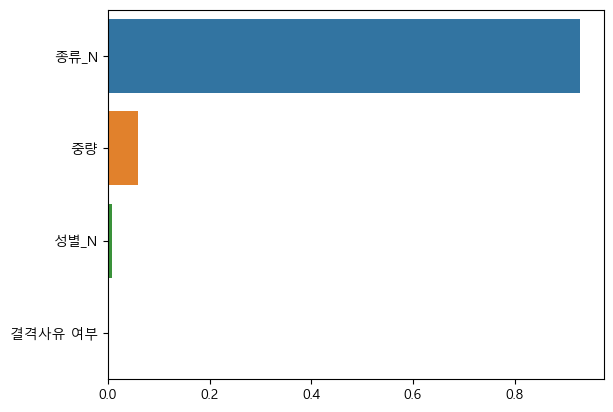

In [13]:
import seaborn as sns
%matplotlib inline
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(feature,target)
feature_series = pd.Series(data=rf_reg.feature_importances_,index=feature.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x=feature_series,y=feature_series.index)